In [1]:
import pickle
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [2]:
movie_data = pickle.load(open('movie_data.pkl','rb'))

In [3]:
df = pd.DataFrame(movie_data)

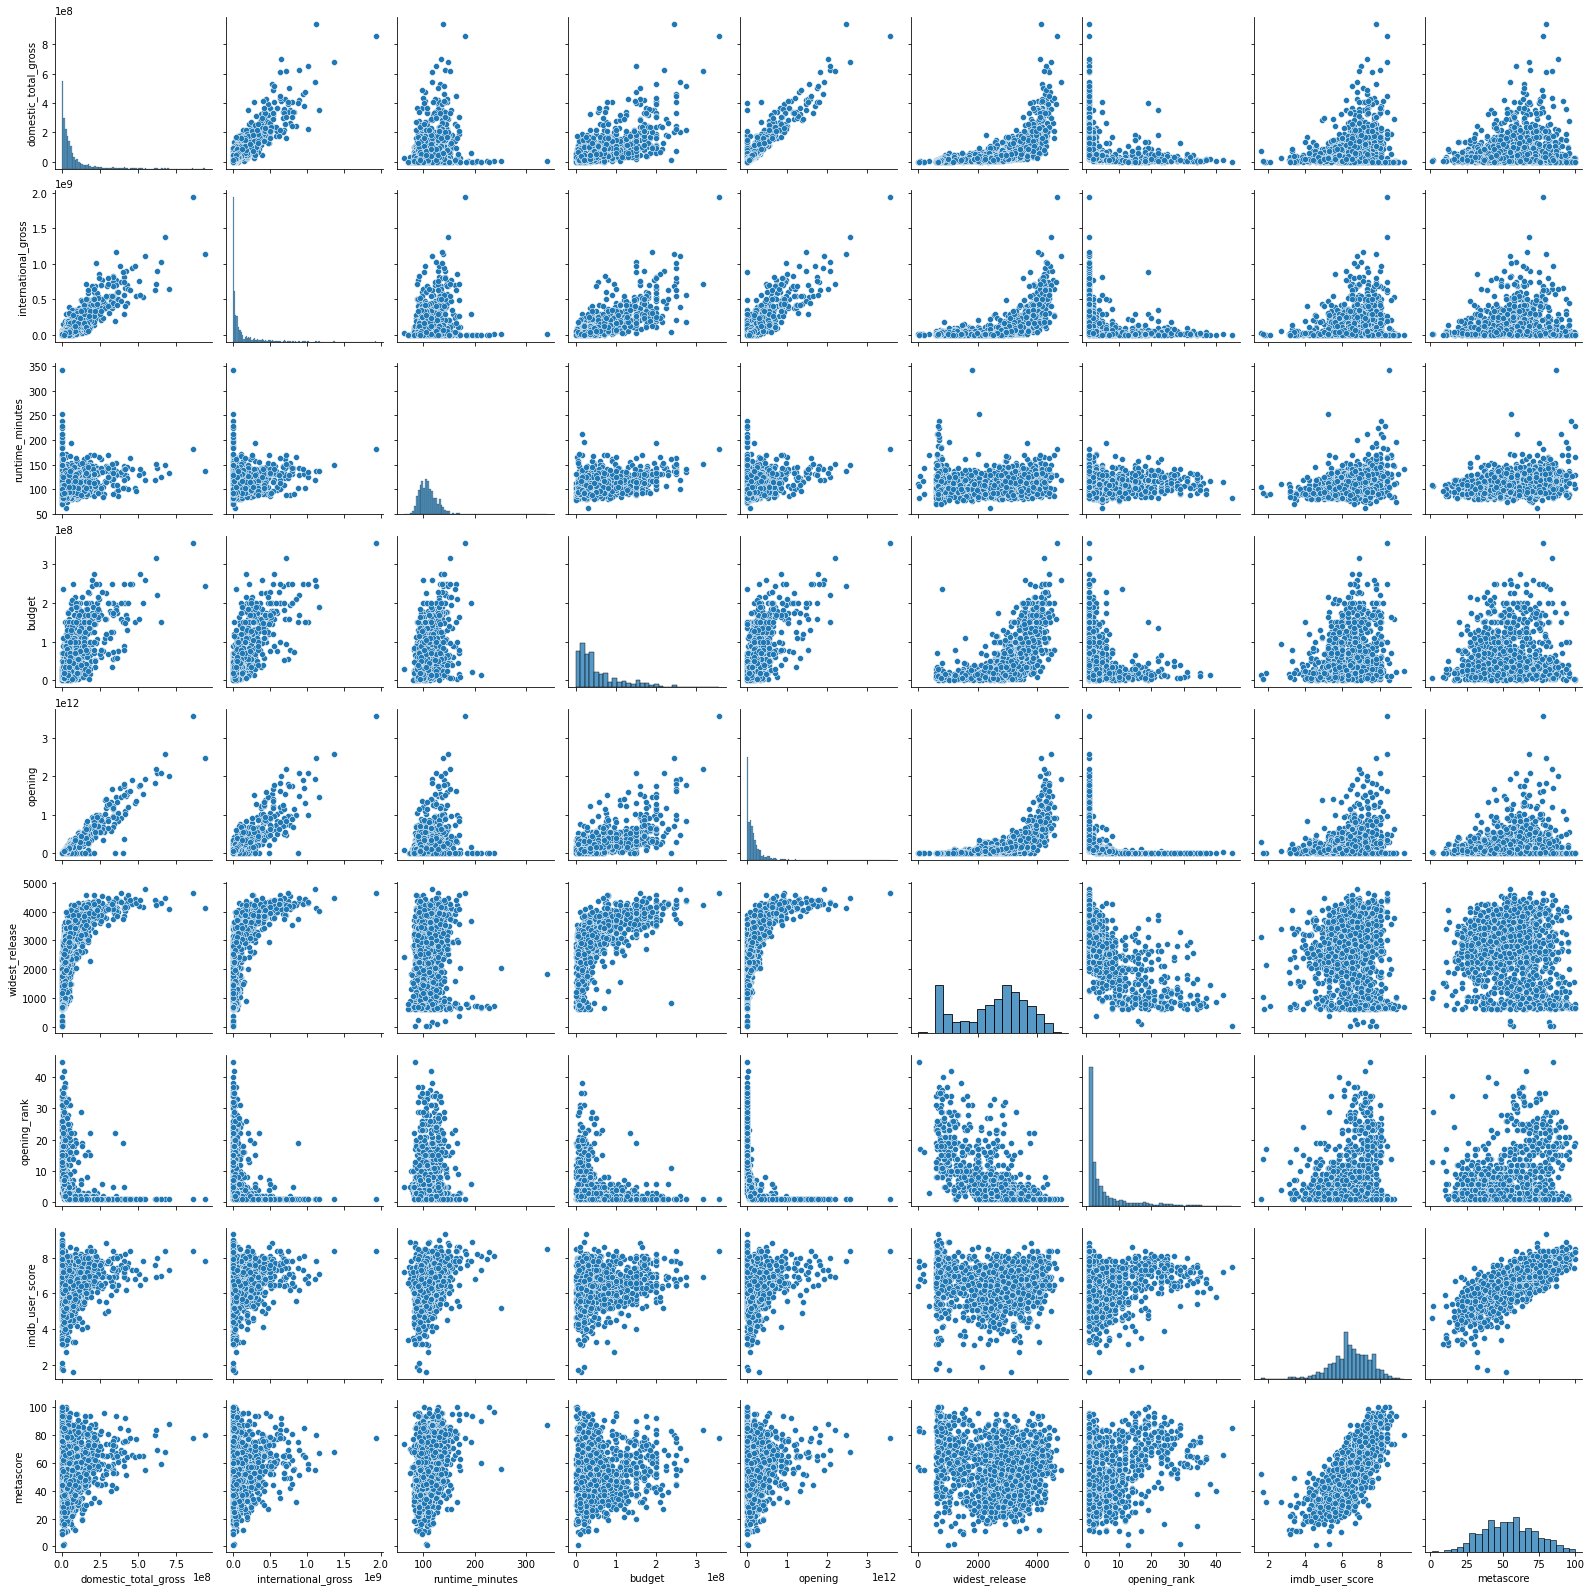

In [4]:
sns.pairplot(df)

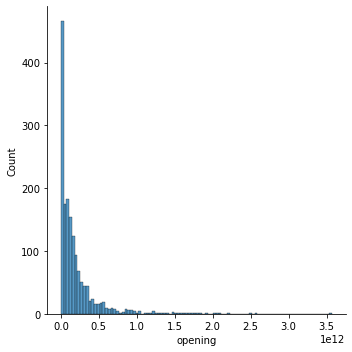

In [5]:
sns.displot(df, x = 'opening')

In [6]:
df['roi'] = (df.domestic_total_gross+df.international_gross)/df.budget
df['roi_log'] = np.log10(df.roi)
df['total_gross'] = df.domestic_total_gross+df.international_gross
df['total_gross_log'] = np.log10(df.total_gross)
df['budget_log'] = np.log10(df.budget)
df['opening_log'] = np.log10(df.opening)
df['opening_rank_log'] = np.log10(df.opening_rank)
df['day_of_year'] = df.release_date.apply(lambda x: x.timetuple().tm_yday)
df['day_of_week'] = df.release_date.apply(lambda x: x.timetuple().tm_wday)
df['number_of_reviewers'] = df.rating_dict.apply(lambda x: x['all_all'][1])
df['number_of_reviewers_log'] = np.log10(df.number_of_reviewers)
df['days_since_release'] = (datetime.date(2022,2,1)-df.release_date.apply(lambda x: x.date())).apply(lambda x: x.days)


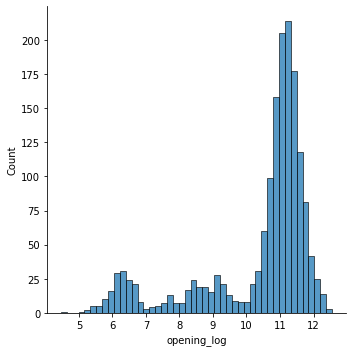

In [7]:
sns.displot(df,x = 'opening_log')

In [8]:
### Looks like there are 3 to 4 levels of openings for movies on a log scale

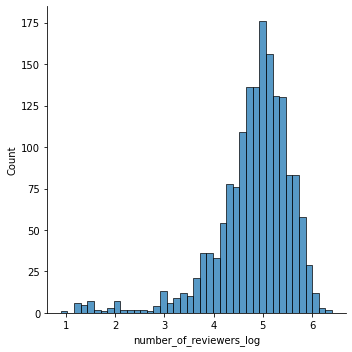

In [9]:
sns.displot(df,x = 'number_of_reviewers_log')

<AxesSubplot:xlabel='days_since_release', ylabel='number_of_reviewers_log'>

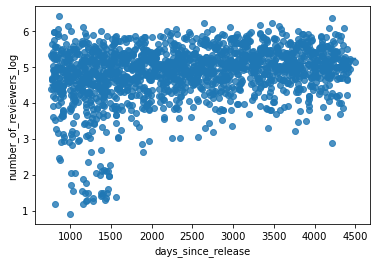

In [10]:
sns.regplot(x = 'days_since_release', y = 'number_of_reviewers_log', data = df)

In [11]:
X = df['days_since_release']
X = sm.add_constant(X)

y = df['number_of_reviewers_log']

movie_model = OLS(y,X)
results = movie_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     number_of_reviewers_log   R-squared:                       0.073
Model:                                 OLS   Adj. R-squared:                  0.073
Method:                      Least Squares   F-statistic:                     131.9
Date:                     Tue, 15 Feb 2022   Prob (F-statistic):           1.90e-29
Time:                             23:10:18   Log-Likelihood:                -1886.7
No. Observations:                     1673   AIC:                             3777.
Df Residuals:                         1671   BIC:                             3788.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3378      0.045     95.697      0.000       4.249       4.427
days_since_release     0.0002   1.71e-05     11.486      0.000       0.000       0.000
==============================================================================
Omnibus:                      500.633   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1691.302
Skew:                          -1.466   Prob(JB):                         0.00
Kurtosis:                       6.957   Cond. No.                     6.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
results.params

const                 4.337791
days_since_release    0.000196
dtype: float64

<AxesSubplot:xlabel='days_since_release', ylabel='number_of_reviewers'>

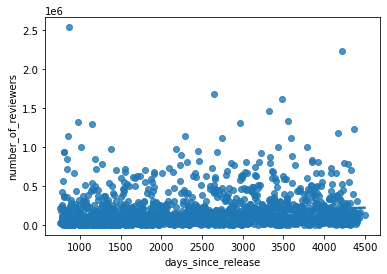

In [13]:
sns.regplot(x = 'days_since_release', y = 'number_of_reviewers', data = df)

In [14]:
X = df['days_since_release']
X = sm.add_constant(X)

y = df['number_of_reviewers']

movie_model = OLS(y,X)
results = movie_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     number_of_reviewers   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.018
Method:                  Least Squares   F-statistic:                     31.68
Date:                 Tue, 15 Feb 2022   Prob (F-statistic):           2.13e-08
Time:                         23:10:18   Log-Likelihood:                -22948.
No. Observations:                 1673   AIC:                         4.590e+04
Df Residuals:                     1671   BIC:                         4.591e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               9.491e+04   1.33e+04      7.140      0.000    6.88e+04    1.21e+05
days_since_release    28.1602      5.003      5.628      0.000      18.347      37.974
==============================================================================
Omnibus:                     1291.083   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30419.093
Skew:                           3.441   Prob(JB):                         0.00
Kurtosis:                      22.724   Cond. No.                     6.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

looks like log does a good job of looking at reviews

In [15]:
### Normalizing number of reviewers
df['number_of_reviewers_log_norm'] = ((df.number_of_reviewers_log-4.337791)-
                                      (df.days_since_release*0.000196))+4.337791

In [16]:
### changing unnits back to number of reviewers
df['number_of_reviewers_norm'] = df.number_of_reviewers_log_norm.apply(lambda x: 10**x)

<AxesSubplot:xlabel='days_since_release', ylabel='number_of_reviewers_log_norm'>

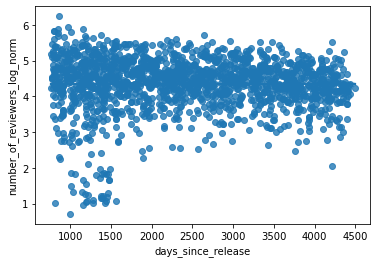

In [17]:
sns.regplot(x = 'days_since_release', y = 'number_of_reviewers_log_norm', data = df)

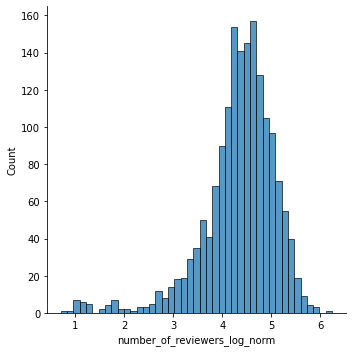

In [18]:
sns.displot(df,x = 'number_of_reviewers_log_norm')

In [19]:
df.columns

Index(['movie_title', 'domestic_total_gross', 'international_gross',
       'runtime_minutes', 'rating', 'release_date', 'distributor', 'budget',
       'opening', 'genres', 'widest_release', 'opening_rank',
       'imdb_user_score', 'metascore', 'rating_dict', 'rating_dist_dict',
       'roi', 'roi_log', 'total_gross', 'total_gross_log', 'budget_log',
       'opening_log', 'opening_rank_log', 'day_of_year', 'day_of_week',
       'number_of_reviewers', 'number_of_reviewers_log', 'days_since_release',
       'number_of_reviewers_log_norm', 'number_of_reviewers_norm'],
      dtype='object')

In [20]:
df['sum_imdb_user_scores'] = df.number_of_reviewers_norm*df.imdb_user_score
df['sum_imdb_user_scores_log'] = np.log10(df.number_of_reviewers_norm*df.imdb_user_score)
df['target_2'] = df.number_of_reviewers_log_norm*df.imdb_user_score

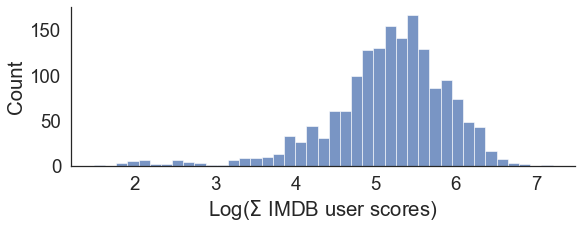

In [21]:
sns.set(style = "white", font_scale = 1.7)
#sns.set(font_scale = 1)
ax = sns.displot(df,x = 'sum_imdb_user_scores_log')

ax.set(xlabel = ('Log('+r"$\Sigma$ IMDB user scores)"))
plt.gcf().set_size_inches(10, 3)

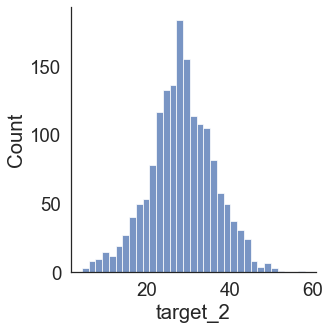

In [22]:
sns.displot(df,x = 'target_2')

In [23]:
df.columns

Index(['movie_title', 'domestic_total_gross', 'international_gross',
       'runtime_minutes', 'rating', 'release_date', 'distributor', 'budget',
       'opening', 'genres', 'widest_release', 'opening_rank',
       'imdb_user_score', 'metascore', 'rating_dict', 'rating_dist_dict',
       'roi', 'roi_log', 'total_gross', 'total_gross_log', 'budget_log',
       'opening_log', 'opening_rank_log', 'day_of_year', 'day_of_week',
       'number_of_reviewers', 'number_of_reviewers_log', 'days_since_release',
       'number_of_reviewers_log_norm', 'number_of_reviewers_norm',
       'sum_imdb_user_scores', 'sum_imdb_user_scores_log', 'target_2'],
      dtype='object')

In [24]:
df.iloc[0].index.values

array(['movie_title', 'domestic_total_gross', 'international_gross',
       'runtime_minutes', 'rating', 'release_date', 'distributor',
       'budget', 'opening', 'genres', 'widest_release', 'opening_rank',
       'imdb_user_score', 'metascore', 'rating_dict', 'rating_dist_dict',
       'roi', 'roi_log', 'total_gross', 'total_gross_log', 'budget_log',
       'opening_log', 'opening_rank_log', 'day_of_year', 'day_of_week',
       'number_of_reviewers', 'number_of_reviewers_log',
       'days_since_release', 'number_of_reviewers_log_norm',
       'number_of_reviewers_norm', 'sum_imdb_user_scores',
       'sum_imdb_user_scores_log', 'target_2'], dtype=object)

In [25]:
genre_counter = {}
for x in df.genres:
    if type(x) == type(float('nan')):
        pass
    for y in x:
        if type(y) == type(float('nan')):
            continue
        if y in genre_counter:
            genre_counter[y] += 1
        else:
            genre_counter[y] = 1

In [26]:
gen_list = list(genre_counter.items())
gen_list = sorted(gen_list, key = lambda x:-x[1])

In [27]:
#### making genre dummies
for x in gen_list:
    dis_list = []
    for y in df.genres:
        if x[0] in y:
            dis_list.append(1)
        else:
            dis_list.append(0)
    df[x[0]] = dis_list

In [28]:
#### making re issue dummies
dis_list = []
for y in df.movie_title:
    if y.endswith(' Re'):
        dis_list.append(1)
    else:
        dis_list.append(0)
df['re_issue'] = dis_list

In [29]:
### making length dummies
dis_list = []
for y in df.runtime_minutes:
    if y < 90:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['short_movie'] = dis_list

dis_list = []
for y in df.runtime_minutes:
    if y > 130:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['long_movie'] = dis_list

dis_list = []
for y in df.runtime_minutes:
    if y <= 130 and y>=90:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['ave_movie'] = dis_list

In [30]:
### making rating dummies
df = df.join(pd.get_dummies(df['rating']))

In [31]:
### making length dummies
dis_list = []
for y in df.opening_log:
    if y < 7:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['opening_low'] = dis_list

dis_list = []
for y in df.opening_log:
    if y >= 7 and y<=10:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['opening_mid'] = dis_list

dis_list = []
for y in df.opening_log:
    if y>10:
        dis_list.append(1)
    else:
        dis_list.append(0)
df['opening_high'] = dis_list


In [32]:
dis_list = []
for index, y in df.iterrows():
    if y.opening_low ==1:
        dis_list.append('low_opening')
    elif y.opening_mid ==1:
        dis_list.append('mid_opening')
    elif y.opening_high ==1:
        dis_list.append('high_opening')
    else:
        dis_list.append(float('nan'))
df['opening_categories'] = dis_list

In [33]:
len(dis_list)

1673

In [34]:
sm_df = df[df['re_issue']==0]
df_no_re = df[df['re_issue']==0]

sm_df = sm_df[['movie_title',
            'sum_imdb_user_scores_log',
            'target_2',
            'total_gross_log',
            'budget_log',
            'opening_log',
            'metascore',
            'imdb_user_score',
            'opening_categories',
            'rating',
            'number_of_reviewers_log']].copy()

In [35]:
sm_df_re = df[df['re_issue']==1]
sm_df_re = sm_df[['movie_title',
            'sum_imdb_user_scores_log',
            'target_2',
            'total_gross_log',
            'budget_log',
            'opening_log',
            'metascore',
            'imdb_user_score',
            'opening_categories',
            'rating',
            'number_of_reviewers_log']].copy()

In [36]:
sm_sm_df = sm_df[['movie_title',
            'sum_imdb_user_scores_log',
            'total_gross_log',
            'metascore',
            'opening_categories',
            'rating']].copy()

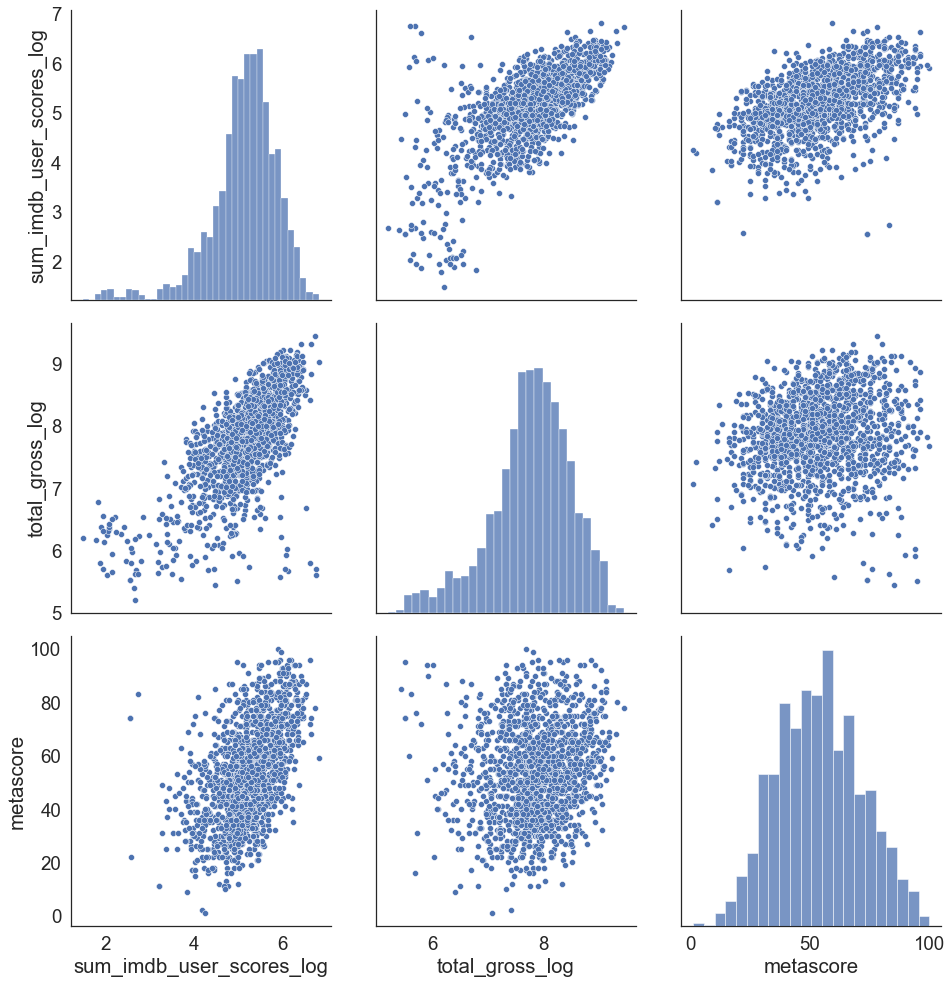

In [51]:
sns.pairplot(sm_sm_df)
plt.gcf().set_size_inches(15,15)

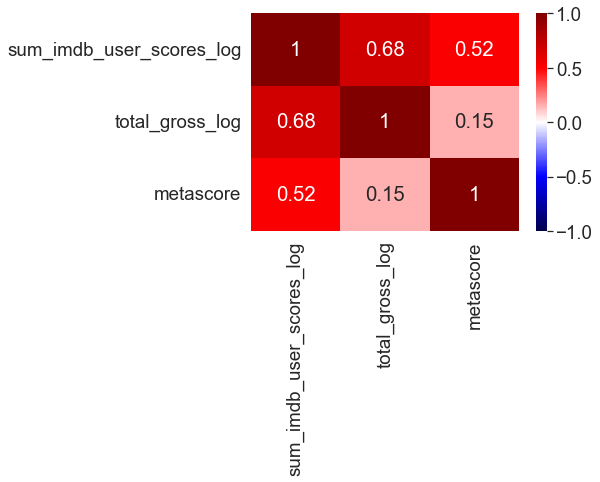

In [39]:
sns.heatmap(sm_sm_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

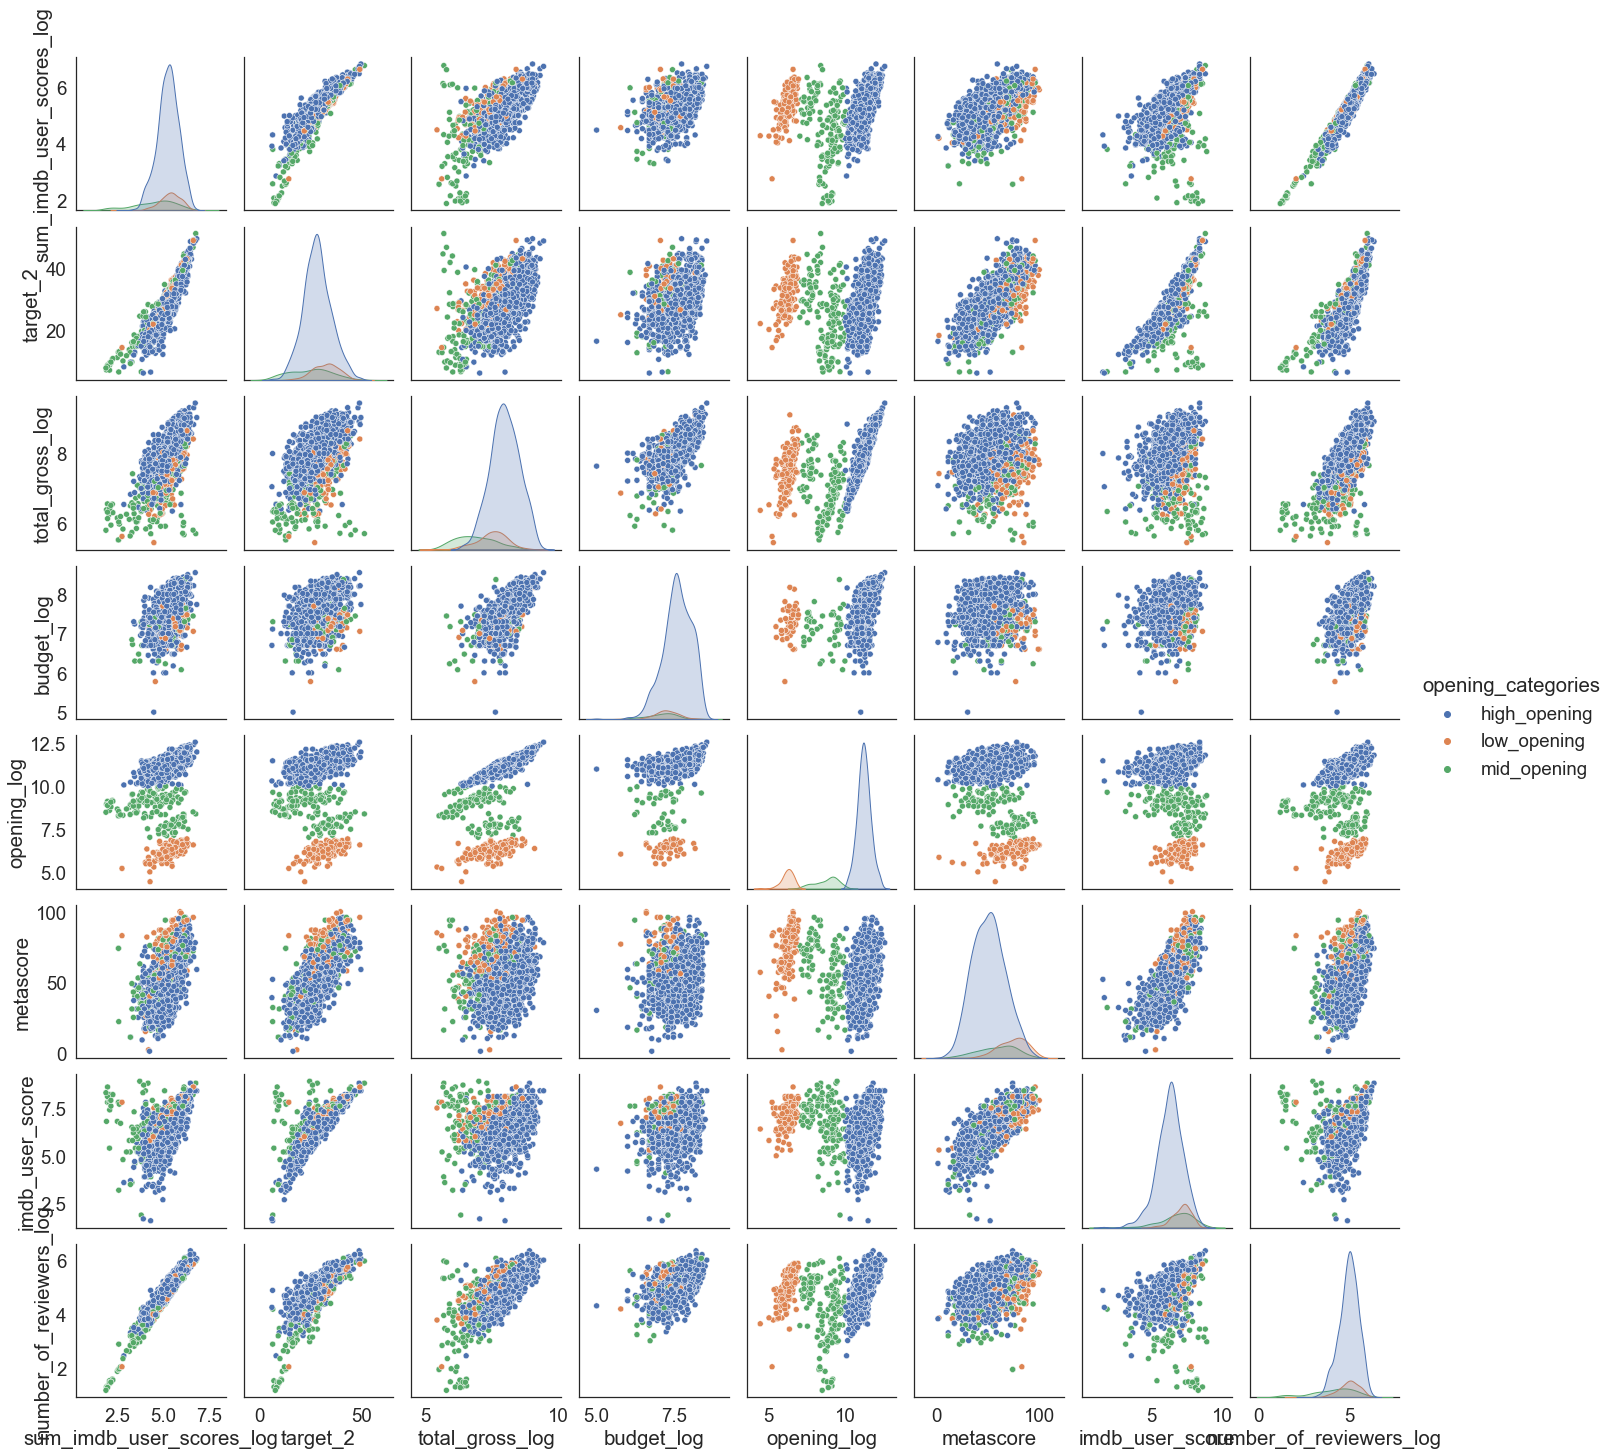

In [40]:
sns.pairplot(sm_df, hue = 'opening_categories')

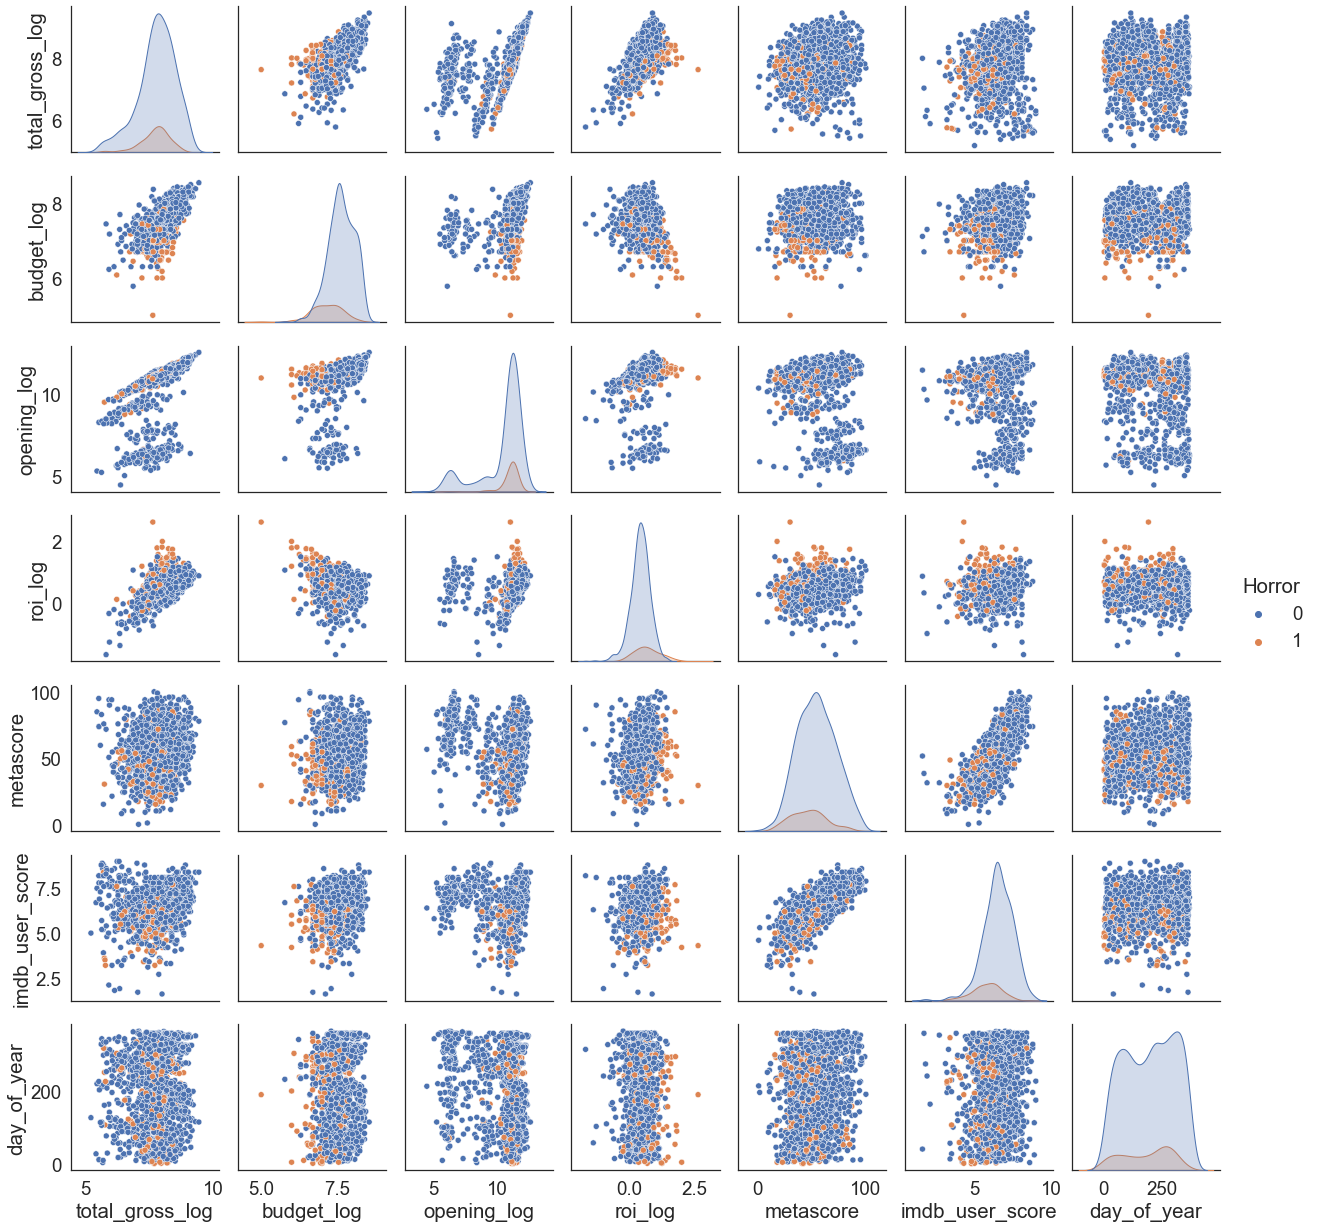

In [41]:
x_gen = 'Horror'

sm_df_h = df[df['re_issue']==0]
sm_df_h = sm_df_h[['movie_title',
            'total_gross_log',
            'budget_log',
            'opening_log',
            'roi_log',
            'metascore',
            'imdb_user_score',
            'opening_categories',
            'day_of_year',
            x_gen,
            'rating']].copy()

sns.pairplot(sm_df_h, hue = x_gen)

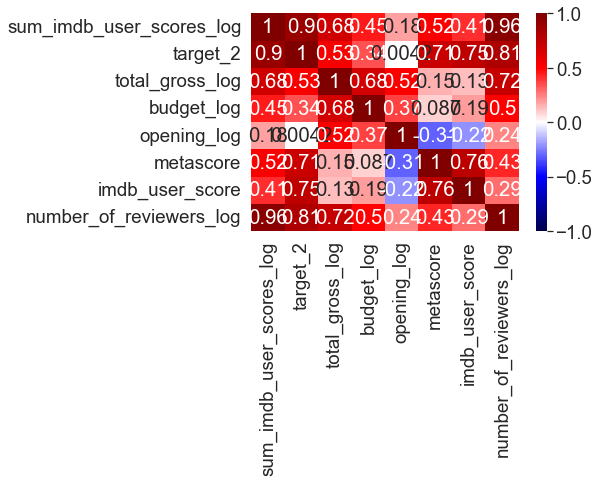

In [42]:
sns.heatmap(sm_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [43]:
df2 = df_no_re[df.budget.notna()].copy()

/var/folders/vc/d1b_km4x7wb1xy8mb31ms7g00000gp/T/ipykernel_51358/3766359117.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df_no_re[df.budget.notna()].copy()


In [44]:
for x in df2.columns:
    print(str(len(df2[(df2[x].isna() == True)]))+' missing in ' + x)

0 missing in movie_title
0 missing in domestic_total_gross
0 missing in international_gross
14 missing in runtime_minutes
14 missing in rating
0 missing in release_date
0 missing in distributor
0 missing in budget
0 missing in opening
0 missing in genres
0 missing in widest_release
6 missing in opening_rank
0 missing in imdb_user_score
4 missing in metascore
0 missing in rating_dict
0 missing in rating_dist_dict
0 missing in roi
0 missing in roi_log
0 missing in total_gross
0 missing in total_gross_log
0 missing in budget_log
0 missing in opening_log
6 missing in opening_rank_log
0 missing in day_of_year
0 missing in day_of_week
0 missing in number_of_reviewers
0 missing in number_of_reviewers_log
0 missing in days_since_release
0 missing in number_of_reviewers_log_norm
0 missing in number_of_reviewers_norm
0 missing in sum_imdb_user_scores
0 missing in sum_imdb_user_scores_log
0 missing in target_2
0 missing in Drama
0 missing in Comedy
0 missing in Action
0 missing in Thriller
0 miss

In [45]:
print(df.columns)

Index(['movie_title', 'domestic_total_gross', 'international_gross',
       'runtime_minutes', 'rating', 'release_date', 'distributor', 'budget',
       'opening', 'genres', 'widest_release', 'opening_rank',
       'imdb_user_score', 'metascore', 'rating_dict', 'rating_dist_dict',
       'roi', 'roi_log', 'total_gross', 'total_gross_log', 'budget_log',
       'opening_log', 'opening_rank_log', 'day_of_year', 'day_of_week',
       'number_of_reviewers', 'number_of_reviewers_log', 'days_since_release',
       'number_of_reviewers_log_norm', 'number_of_reviewers_norm',
       'sum_imdb_user_scores', 'sum_imdb_user_scores_log', 'target_2', 'Drama',
       'Comedy', 'Action', 'Thriller', 'Adventure', 'Fantasy', 'Romance',
       'Family', 'Sci-Fi', 'Crime', 'Mystery', 'Horror', 'Animation',
       'Biography', 'History', 'Musical', 'Music', 'Sport', 'War',
       'Documentary', 'Western', 'Film-Noir', 're_issue', 'short_movie',
       'long_movie', 'ave_movie', 'G', 'Not Rated', 'PG', 'PG-1

In [46]:
df2 = df2.dropna().reset_index()

In [65]:
normalized_list = ['sum_imdb_user_scores_log','target_2','domestic_total_gross', 'international_gross',
       'runtime_minutes', 'budget',
       'opening', 'widest_release', 'opening_rank',
       'imdb_user_score', 'metascore',
       'roi', 'roi_log', 'total_gross', 'total_gross_log', 'budget_log',
       'opening_log', 'opening_rank_log']

In [66]:
df_norm = df2[['movie_title']]
for c in normalized_list:
    df_norm[c] = df2[c].apply(lambda x: (x-df2[c].mean())/df2[c].std())

/var/folders/vc/d1b_km4x7wb1xy8mb31ms7g00000gp/T/ipykernel_51358/2689246519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm[c] = df2[c].apply(lambda x: (x-df2[c].mean())/df2[c].std())


In [67]:
X = df_norm[['total_gross_log','metascore']]
y = df_norm['sum_imdb_user_scores_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)
lm = LinearRegression() 

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lm_cv = cross_val_score(lm, X_train, y_train, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lm_cv)

# to print the mean score with standard deviation, rounded to 2 decimals
print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

[0.62902341 0.64162455 0.55076542 0.57275679 0.65440779]
0.61 +- 0.04


In [75]:
X = df_norm[['total_gross_log','metascore']]
y = df_norm['sum_imdb_user_scores_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                       test_size=.2,     
                                       random_state=42)
lm = LinearRegression() 

kf = KFold(n_splits=5, # number of folds
     shuffle=True, # randomizes order of rows before split
     random_state = 42) # using same number in future code/ rerunning allows us to replicate the split 

#to see all validation scores
lm_cv = cross_val_score(lm, X_train, y_train, # estimator, features, target
     cv= kf, # folds created above; could also just use a number 
     scoring='r2') # scoring metric
print(lm_cv)

# to print the mean score with standard deviation, rounded to 2 decimals
print(np.round(np.mean(lm_cv), 2), "+-", np.round(np.std(lm_cv),2))

[0.32594955 0.34780743 0.2892206  0.31184443 0.38549227]
0.33 +- 0.03


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [74]:
movie_model = OLS(df_norm['roi_log'],df_norm[['metascore']])
results = movie_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                roi_log   R-squared (uncentered):                   0.052
Model:                            OLS   Adj. R-squared (uncentered):              0.051
Method:                 Least Squares   F-statistic:                              58.77
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                    3.93e-14
Time:                        23:36:59   Log-Likelihood:                         -1507.6
No. Observations:                1083   AIC:                                      3017.
Df Residuals:                    1082   BIC:                                      3022.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
metascore      0.2270      0.030      7.666      0.000       0.169       0.285
==============================================================================
Omnibus:                       79.778   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              308.286
Skew:                           0.235   Prob(JB):                     1.14e-67
Kurtosis:                       5.571   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
df2[['runtime_minutes', 'widest_release', 'opening_rank',
                           'imdb_user_score', 'metascore',
                           'opening_log', 'opening_rank_log', 'day_of_year', 'day_of_week',
                           'Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Fantasy',
                           'Romance', 'Family', 'Sci-Fi', 'Crime', 'Mystery', 'Horror',
                           'Animation', 'Biography', 'History', 'Musical', 'Music', 'Sport', 'War',
                           'Documentary', 'Western', 'short_movie','ave_movie',
                           'long_movie', 'G', 'Not Rated', 'PG', 'PG-13', 'R',
                           'opening_low', 'opening_mid', 'opening_high']]

runtime_minutes  widest_release  opening_rank  imdb_user_score  \
0               105.0            3768           1.0              4.5   
1                92.0            2459           2.0              5.7   
2                97.0            3948           1.0              7.0   
3               132.0            3907           3.0              7.7   
4                81.0            3117           3.0              6.2   
...               ...             ...           ...              ...   
1078             95.0            3113           3.0              7.3   
1079            105.0            2950           1.0              5.8   
1080             93.0            2524           7.0              4.4   
1081             89.0            3202           1.0              6.4   
1082            116.0            3417           1.0              5.7   

      metascore  opening_log  opening_rank_log  day_of_year  day_of_week  \
0          31.0    11.586139          0.000000           40            4   
1          51.0    11.209985          0.301030          106            4   
2          56.0    11.841555          0.000000          150            4   
3          72.0    11.846124          0.477121          136            3   
4          54.0    11.263878          0.477121          283            4   
...         ...          ...               ...          ...          ...   
1078       67.0    11.230582          0.477121          290            4   
1079       45.0    11.131470          0.000000           56            4   
1080       37.0    10.783679          0.845098          161            4   
1081       61.0    11.642458          0.000000          206            4   
1082       37.0    11.551123          0.000000           70            4   

      Drama  ...  ave_movie  long_movie  G  Not Rated  PG  PG-13  R  \
0         1  ...          1           0  0          0   0      0  1   
1         0  ...          1           0  0          0   0      0  1   
2         0  ...          1           0  0          0   1      0  0   
3         0  ...          0           1  0          0   0      1  0   
4         1  ...          0           0  0          0   1      0  0   
...     ...  ...        ...         ... ..        ...  ..    ... ..   
1078      0  ...          1           0  0          0   1      0  0   
1079      0  ...          1           0  0          0   0      0  1   
1080      0  ...          1           0  0          0   1      0  0   
1081      0  ...          0           0  0          0   0      0  1   
1082      0  ...          1           0  0          0   0      1  0   

      opening_low  opening_mid  opening_high  
0               0            0             1  
1               0            0             1  
2               0            0             1  
3               0            0             1  
4               0            0             1  
...           ...          ...           ...  
1078            0            0             1  
1079            0            0             1  
1080            0            0             1  
1081            0            0             1  
1082            0            0             1  

[1083 rows x 41 columns]

In [70]:
df_genres = df2[['Drama', 'Comedy', 'Action', 'Thriller', 'Adventure', 'Fantasy',
       'Romance', 'Family', 'Sci-Fi', 'Crime', 'Mystery', 'Horror',
       'Animation', 'Biography', 'History', 'Musical', 'Music', 'Sport', 'War',
       'Documentary', 'Western']]

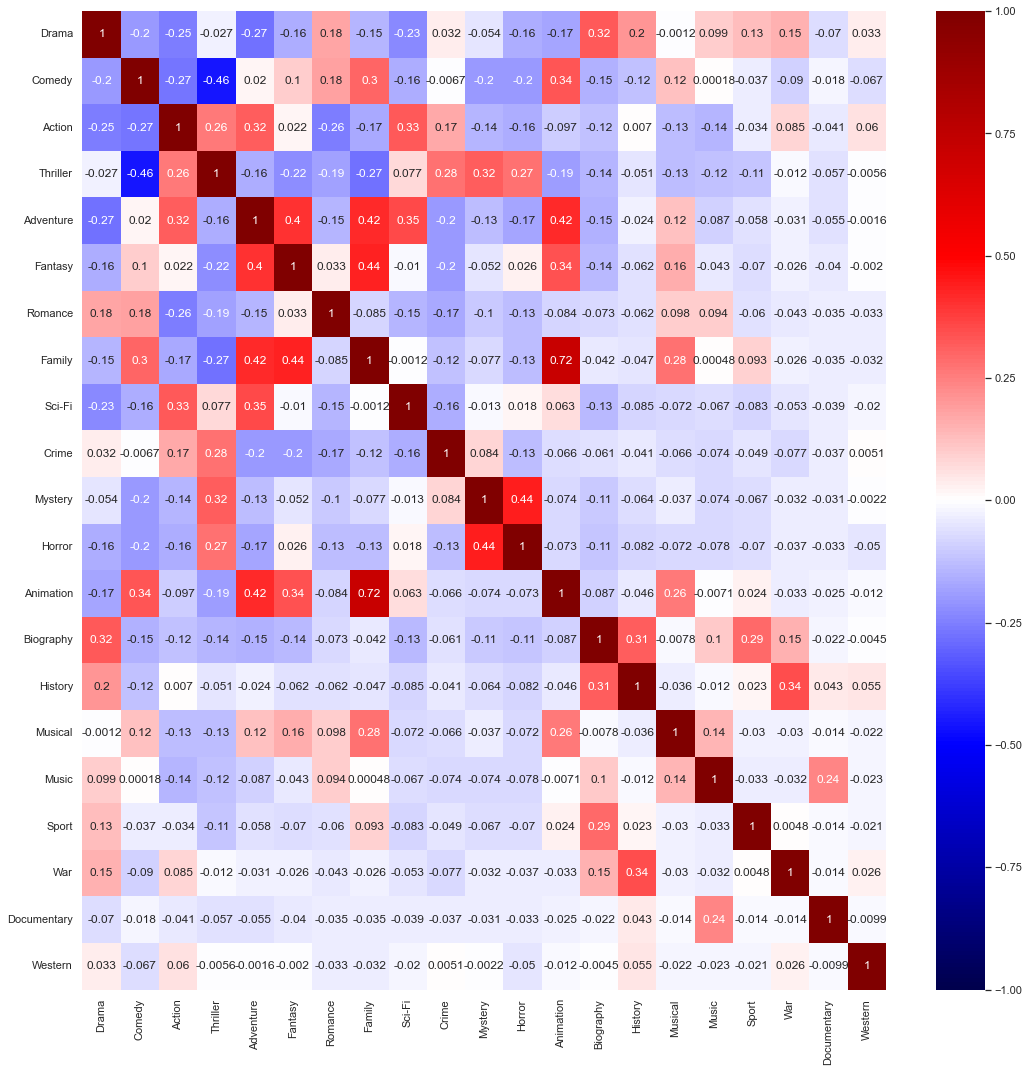

In [71]:
sns.set(rc = {'figure.figsize':(18,18)})
sns.heatmap(df_genres.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


In [72]:
### normalize features
### look into 